# Recurrent Neural Networks for Protein Secondary Structure Prediction

- David Wang
- Michelle Franc Ragsac
- Jimmy Quach
- Dhaivath Raghupathy
- Shih-Cheng Huang 

## Why is it important to predict secondary structures?

Within the body, proteins can be found in various shapes and sizes, and each possessing their own function. Some can be structural components that help retain an organ’s rigidity, and others can be metabolic components, breaking apart or putting together biomolecules. All proteins have several layers of structure that are important to the process of protein folding and their underlying functions. The most basic structure is the sequence of amino acid residues themselves. Amino acids are organic compounds that contain amine and carboxyl chemical groups, and are distinguishable from one another from their side chain, a connected chemical group. This side chain gives amino acids different chemical properties, such as differences in hydrophobicity, electrical charge, and branching groups. 

The secondary structure of proteins, which we will focus on during this project, refers to local folded structures that form due to interactions in the protein “backbone”. Due to their side chains, certain amino acids might be more or less inclined to conform to one of these secondary conformations and will thus ultimately affect their resulting function. There are 8 total types of secondary structures indicated by the Dictionary of Protein Secondary Structure, each with their specific functions and properties. These include:

- The 3,10 Helix which contains a minimum length of 3 residues, 
- The Alpha Helix which is a minimum length of 4 residues, 
- The Pi Helix which contains a minimum length of 5 residues, 
- The T structure which has 3 - 5 turns of hydrogen bonding, 
- The E structure which is a minimum of 2 residues and extends parallel or anti-parallel to the Beta sheet, 
- The B structure which contains a residue within the beta bridge, 
- The S structure that has no hydrogen bonds, and finally 
- The C structure(s) which are structures that do not belong to any of the other categories. 

An example of of the effect of protein structures can be seen with human diseases like Sickle Cell Anemia which results from a defect in a protein’s three-dimensional structure due to properties from its secondary structure.

For this project, we plan to answer: How can we determine protein structure through the sequencing data obtained from proteins? To tackle this question, we plan on applying machine learning techniques such as neural networks to develop a tool that uses sequencing data as input and returns a predicted structure. Furthermore using the resulting output we also wish to determine if there are any correlations between properties of proteins and the prediction accuracies that could further assist in predicting protein structure. With a massive amount of protein sequence data produced by sequencing technologies, the role of protein structure prediction is now more important than ever!

## The Data

We will be using a dataset from the ICML 2014 Deep Supervised and Convolutional Generative Stochastic Network paper for this study: <a href=http://www.princeton.edu/~jzthree/datasets/ICML2014/><strong>cullpdb+profile_6133</strong></a>. The data is originally in numpy format as a (N protein x k features) matrix, but we reshape this to (N protein x 700 amino acids x 44 features). Of these 44 features, 22 are amino acids, and the other 22 are a combination of relative and absolute solvent accessibility and sequence profiles. 

Solvent accessibility refers to the potential amount of water that can touch and react with the amino acids in the protein. This is very important because as mentioned above, amino acids possess various chemical properties, one of which includes their willingness to interact with water. Thus, the amino acids will conform into various structures that encourage their existing behaviors and properties. 

Sequence profiles are utilized as a feature because they assist in accounting for the genetic variability present within the sequences. Profiles account for varying probabilities of amino acids appearing in a certain position within a sequence and thus due to certain amino acids having particular functions and tendencies such as their willingness to interact with water, it allows us to account for possible variations of the sequence anThe data is originally in numpy format as a (N protein x k features) matrix, but we reshape this to (N protein x 700 aUnfmino acids x 44 features). Of these 44 features, 22 are amino acids, and the other 22 are a combination of relative and absolute solvent accessibility and sequence profiles. This will provide a stronger analysis to what structure is derived from the inputted sequence. 

### Data Cleaning

We used one-hot-encoding to represent the 21 different amino acids in our dataset, along with the secondary structure labels, which were also one-hot-encoded. The amino acid sequences were of various lengths, so we used a 22nd entry in the one-hot-encoded vector of amino acids to represent “no sequence”. We reshaped the inputs as described in the data description section to feed it into the network, and also split our data into three sets: a training, validation, and test set. 

## Data Analysis & Results

After cleaning and pre-processing our data, we fed this as the input to a neural network, which is built using TensorFlow. We have included the code segments for the neural network later in this section. 

The hyperparameters used in our network as follows:

![hyperparameters table](Pr_023-master/hyperparameter_values_table.png "Hyperparameters Table")

Here is an image of our network topology, followed by an in-depth explanation incase our audience is not familiar with neural nets:

![network topology diagram](Pr_023-master/network_topology_diagram.png "Network Topology Diagram")

We split our 44 features into two 22-feature categories: amino acids residues and relative/absolute solvent accessibility. We feed these into two separate 1D CNN’s as input. These CNN’s will use filter sizes of 3, 5, and 7 independently sliding through the sequences to look for amino acid motifs(repeated sequences). Each filter size has 16 different filters. We use same-padding, so each CNN output is a (700 x #Filters) tensor. Then we apply batch normalization as a form of regularization and to speed up training. We concatenate these 3 output tensors, along with the original input(to avoid losing information between layers) independently for both categories of features. 

We repeat the convolutional layer for both feature categories with filter sizes of 1, 2, and 3. This time, when concatenating the 3 output tensors, we include the output of the first CNN (of filter sizes 3, 5, and 7) instead of the original input. 

Now we combine the results of the two categories(vertical stack), reshape the tensor, and feed this into a fully connected layer. We take the output of this layer, and feed it as input to a bidirectional Recurrent Neural Network (RNN). Each direction is comprised of a 250 LSTM (Long Short Term Memory) cells. This is done to capture features based on relative position of amino acids in the sequence. 

We feed the output of the RNN to two more fully connected layers(The image above only shows 1, but this is due to lack of space on the page). The output of the final layer is (700 amino acids x 9 secondary structures) representing probability of each of the 9 structures based on the given sequence, where the 9 structures include the 8 structures mentioned above as well as an additional structure category for sequences that were predicted to have no structure. We use softmax with cross-entropy loss to predict the structure, and compare it with the true value. We trained the network for 1000 epochs(passes through the data), judging our improvement against the validation set at the end of each epoch.

Finally, we examined our results on the test set and analyzed the results. 
The result of the output layer is a 700 x 9 tensor, representing the probability distribution(across the 9 secondary structures) for each amino acid. We take the maximum of the 9 probabilities for each of the 700 amino acids, resulting in our 700 x 1 prediction of secondary structures. To calculate the accuracy, we compare this vector with the input labels (across the 700 amino acids), and report the correct proportion. We originally observed a very high accuracy after training. We realized this is attributed to correct predictions of zero padding for sequences shorter than 700 amino acids. This zero padding does not contribute to the biological classification of secondary protein structure, so our accuracy measure only reports predictions for the valid amino acids.

### Parsing the Data & Constructing the Neural Network

Within this section, we have added the the code segments used in parsing the ICML 2014 dataset, as well as constructing the neural network. The files can also be found at: ```marshuang80/```<a href="https://github.com/marshuang80/Protein_structure_prediction">```Protein_structure_prediction```.</a>

<b>** Please note that these code segments were not directly run in this notebook because they would have taken hours to run. We ran these segments on a groupmate's computer. **</b>

#### ```Protein_structure_prediction/read_data.py```

Within this repository, the <b><a href="https://github.com/marshuang80/Protein_structure_prediction/blob/master/read_data.py">```read_data.py```</a></b> file parses our data files and generates the neural network inputs.

In [1]:
def read_data(file_name):
    '''Read the input file and split the data input features and labels
    Args:
        file_name (String): input file name
    Return:
        seq (np.array): lists of one-hot encoded amino acid sequence
        f (np.array): list of properties for the protein sequence
        y (np.array): one-hot encoded labels
    '''
    # Load input data
    input_data = np.load(file_name)
    input_data.shape = (6133,700,57)

    # Get one-hot encoded labels
    y = input_data[:,:,22:31].astype(np.float32)

    # One-hot encoded amino acid seqeuences
    seq = input_data[:,:,:22].astype(np.float32)

    # Other features: N & C terminals, solvent accessibility, sequence profile
    f = input_data[:,:,35:].astype(np.float32)

    return seq,f,y


def test_batch(x,f,y,split):
    '''Split the input data into train and test batches
    Args:
        x (list): aa features
        f (list): sequence profiles
        y (list): sequence labels
        ratio (float): ratio of training to testing set
    Return:
        x_train: batch of train aa
        f_train: batch of trian features
        y_train: batch of train label
        x_test: batch of test aa
        f_test: batch of test features
        y_test: batch of test label
    '''
    x_train, f_train, y_train = x[:split], f[:split], y[:split]
    x_test, f_test, y_test = x[split:], f[split:], y[split:]

    return x_train, f_train, y_train, x_test, f_test, y_test


def valid_batch(x,f,y,batch_size, ratio):
    '''Generate random batches of samples during training
    Args:
        x (list): input aa
        f (list): input features
        y (list): sequence labels
        batch_size (int): size of each training batch
        ratio (float): ratio of training to validation set
    Return:
        x_train: batch of aa
        f_train: batch of features
        y_train: batch of train label
        x_valid: batch of validation data
        f_valid: batch of features
        y_valid: batch of validation label
     '''
    # Sample data with batch_size
    idx = random.sample(range(len(x)),batch_size)
    xs, fs, ys = x[idx], f[idx], y[idx]

	# Generate batches
    split = int(len(xs) * ratio)
    x_train, f_train, y_train = xs[:split], fs[:split], ys[:split]
    x_valid, f_valid, y_valid = xs[split:], fs[split:], ys[split:]
    return x_train, f_train, y_train, x_valid, f_valid, y_valid

#### ```Protein_structure_prediction/structure_prediction.py```

The <b><a href="https://github.com/marshuang80/Protein_structure_prediction/blob/master/structure_prediction.py">```structure_prediction.py```</a></b> file contains the neural network used to predict protein secondary structures. 

<i>Note: Within this final report, this block of code was not run within the notebook because it takes several hours to complete. We instead completed this segment outside of the notebook and then compiled the data afterwards.</i>

In [ ]:
import tensorflow as tf
import numpy as np

# we have included read_data in a different cell
# from read_data import *

# Neural network parameters
file_name = 'cullpdb+profile_6133.npy.gz'
batch_size = 128
epoches = 1000
learning_rate = 0.0005
num_input_variables = 22
num_filter = 16
num_rnn_cells = 256
sequence_length = 700
hidden_neurons_1 = 512
hidden_neurons_2 = 256
hidden_neurons_3= 256
num_output_class = 9
valid_ratio = 1
filter_sizes = [3,5,7]
filter_sizes_2 = [1,2,3]
random_seed = 7

# Lists to store outputs
losses = []
accs = []

# Input placeholders
x_input = tf.placeholder(np.float32, shape=[None, sequence_length, num_input_variables])
var_input = tf.placeholder(np.float32, shape=[None, sequence_length, 22])
y_label = tf.placeholder(np.float32, shape=[None, sequence_length, num_output_class])
alpha = tf.placeholder(tf.float32, shape = [])


def conv_aa_layers(x_input):
    '''The function generates a few convolutional network layers with 3,5,7
    filter lengths for the one-hot encoded amino acid sequence.
    Args:
        x_input (tf.placeholder): The batch of one hot encoded protein sequence
    Returns:
        conv_output (list): List of outputs from each CNN layer
     '''
    conv_outputs = []

    # Using 1d convolution to scan over the sequence with window of "size"
    for size in filter_sizes:

        with tf.name_scope("conv_%i"%(size)):
            # Define convolution weights
            conv_w = tf.get_variable("conv_%i"%size, shape = [size, num_input_variables,
               num_filter], initializer = tf.contrib.layers.xavier_initializer(seed = random_seed))

            # Get convolution output from filters
            conv_out_w = tf.nn.conv1d(x_input, conv_w, stride = 1,
                        padding = "SAME",)

            # Activation
            conv_output = tf.nn.relu(conv_out_w, name = "conv_%i_activation"%size)

            # Batch nomalization
            conv_output = tf.layers.batch_normalization(conv_output)

        conv_outputs.append(conv_output)

    return conv_outputs


def conv_features_layers(var_input):
    '''The function generates a few convolutional network layers with 3,5 and 7
    filter lengths on the input features.
    Args:
        var_input (tf.placeholder): The batch of protein features
    Returns:
        conv_features_output (list): List of outputs from each features
                                     convolutional neural network layer
     '''
    conv_features_outputs = []
    for size in filter_sizes:

        with tf.name_scope("conv_freaters_%i"%(size)):
            # Define convolution weights and biases
            conv_w = tf.get_variable("conv_features_%i"%size, shape = [size, num_input_variables,
               num_filter], initializer = tf.contrib.layers.xavier_initializer(seed = random_seed))
            # Get convolution output from filters
            conv_out_w = tf.nn.conv1d(var_input, conv_w, stride = 1,
                        padding = "SAME",)
            # Activation
            conv_output = tf.nn.relu(conv_out_w, name = "conv_%i_activation"%size)

            # Batch nomalization
            conv_output = tf.layers.batch_normalization(conv_output)

        conv_features_outputs.append(conv_output)

    return conv_features_outputs


def concat_layer(conv_outputs, conv_features_outputs, x_input, var_input):
    '''Concaternate and reshape each convolution outputs by horizontally stacking
    them together with the original inputs
    Args:
        conv_outputs (list): List of outputs from aa neural network layer 1
        conv_features_outputs (list): List of output from the features nn layer 1
        x_input (tensor): original one-hot encoded sequence
        var_input (tensor): original features vectors
    Returns:
        concat_aa (tensor): concatinated tensor from amino acid CNN layer 1
        concat_features (tensor): concatinated tensor from features CNN layer 1
    '''
    # Concat outputs from amino acid CNN layers
    to_concat = [layer for layer in conv_outputs]
    concat_outputs = tf.concat(to_concat, 2)

    # Concat with original data
    concat_aa = tf.concat([concat_outputs, x_input],2)

    # Concat outputs from features CNN layers
    to_concat_features  = [layers1 for layers1 in conv_features_outputs]
    concat_features_outputs = tf.concat(to_concat_features, 2)

    # Concat wuth original features
    concat_features = tf.concat([concat_features_outputs, var_input],2)

    return concat_aa, concat_features


def conv_aa_layers_2(concat_aa):
    '''The function generates the second convolutional network layers with 1,2,3
    filter lengths for the outputs from first amino acid cnn layer.
    Args:
        concat_aa (tf.placeholder): The batch of one hot encoded protein sequence
    Returns:
        conv_output (list): List of outputs from each CNN layer
     '''
    conv_outputs = []

    # Using 1d convolution to scan over the sequence with window of "size"
    for size in filter_sizes_2:

        with tf.name_scope("conv2_%i"%(size)):
            # Define convolution weights and biases
            conv_w = tf.get_variable("conv2_%i"%size, shape = [size, num_input_variables + 3*num_filter,
               num_filter], initializer = tf.contrib.layers.xavier_initializer(seed = random_seed))

            # Get convolution output from filters
            conv_out_w = tf.nn.conv1d(concat_aa, conv_w, stride = 1,
                        padding = "SAME",)

            # Activation
            conv_output = tf.nn.relu(conv_out_w, name = "conv2_%i_activation"%size)

            # Batch normailization
            conv_output = tf.layers.batch_normalization(conv_output)

        conv_outputs.append(conv_output)

    return conv_outputs


def conv_features_layers_2(concat_features):
    '''The function generates a few convolutional network layers with 1,2 and 3
    filter lengths for the outputs from the first features cnn layer
    Args:
        concat_features (tf.placeholder): The concaternated output from the first
                                          features CNN layer
    Returns:
        conv_output (list): List of outputs from each neural network
     '''
    conv_outputs = []

    # Using 1d convolution to scan over the sequence with window of "size"
    for size in filter_sizes_2:

        with tf.name_scope("conv2_features_%i"%(size)):
            # Define convolution weights and biases
            conv_w = tf.get_variable("conv2_features_%i"%size, shape = [size, num_input_variables + 3*num_filter,
               num_filter], initializer = tf.contrib.layers.xavier_initializer(seed = random_seed))

            # Get convolution output from filters
            conv_out_w = tf.nn.conv1d(concat_features, conv_w, stride = 1,
                        padding = "SAME",)

            # Activation
            conv_output = tf.nn.relu(conv_out_w, name = "conv_features_%i_activation"%size)

            conv_output = tf.layers.batch_normalization(conv_output)

        conv_outputs.append(conv_output)

    return conv_outputs


def concat_layer_2(conv_outputs, conv_features_outputs, concat_aa, concat_features):
    '''Concaternate and reshape each convolution outputs by horizontally stacking
    them together with the first CNN outputs. The concatinate resultst form AA
    and features together.
    Args:
        conv_outputs (list): List of outputs from aa neural network layer 1
        conv_features_outputs (list): List of output from the features nn layer 1
        concat_aa (tensor): outputs from first amino acid CNN layer
        concat_features (tensor): outputs from first features CNN layer
    Returns:
        concat_input (tensor): concatinated tensor from amino acid CNN layer 1
    '''
    # Concat layers trained on aa
    to_concat = [layer for layer in conv_outputs]
    concat_outputs = tf.concat(to_concat, 2)
    concat_outputs = tf.concat([concat_outputs,concat_aa],2)

    # Concat layers trained on freatures
    to_concat_features  = [layers1 for layers1 in conv_features_outputs]
    concat_features_outputs = tf.concat(to_concat_features, 2)
    concat_features_outputs = tf.concat([concat_features_outputs,concat_features], 2)

    # Concat both features and aa
    concat_input = tf.concat([concat_features_outputs,concat_outputs],2)

    # First fully connected layer with 200 neurons
    reshape_layer_1 = tf.reshape(concat_input, [batch_size * sequence_length, 2*(3*num_filter+3*num_filter+num_input_variables)])
    layer_1 = tf.layers.dense(reshape_layer_1, hidden_neurons_1, activation=tf.nn.relu, use_bias=True)
    concat_input =  tf.layers.batch_normalization(layer_1)

    return concat_input


def bi_nn_layer(rnn_input):
    '''Run a bidirectional recurrent neural network on input data
    Args:
        rnn_input (tensor): The data to run RNN on
    Retuns:
        rnn_output_dropout (tensor): The output from RNN
    '''
    # Split the input data
    rnn_inputs = tf.split(rnn_input, sequence_length, 0)

    # bidirectional rnn
    rnn_forward = tf.contrib.rnn.BasicLSTMCell(num_rnn_cells)
    rnn_backward = tf.contrib.rnn.BasicLSTMCell(num_rnn_cells)
    rnn_outputs, _, _ = tf.contrib.rnn.static_bidirectional_rnn(rnn_forward,
                        rnn_backward,rnn_inputs,dtype = tf.float32) # dtype?

    # Reshape RNN output
    rnn_outputs_reshaped = tf.reshape(rnn_outputs, [batch_size*sequence_length, 2*num_rnn_cells])

    # Weight dropout for regularization
    rnn_outputs_dropout = tf.nn.dropout(rnn_outputs_reshaped, keep_prob = 0.5)

    return rnn_outputs_dropout


def dense_layers(rnn_outputs_dropout):
    '''3 fully connnect layers
    Args:
        rnn_outputs_dropout (tensor): The recurrent neural network output
    Return:
        dense_output (tensor): batch_size*700*9 tensor for confidence in the
                               different categories
    '''
    # Fully connected layer 1
    dense_layer = tf.layers.dense(rnn_outputs_dropout, hidden_neurons_2, activation=tf.nn.relu, use_bias=True)

    # Fully connected layer 2
    dense_layer1 = tf.layers.dense(dense_layer, hidden_neurons_3, activation=tf.nn.relu, use_bias=True)

    # Last fully connected layer
    dense_layer_2 = tf.layers.dense(dense_layer1, num_output_class,
                use_bias=True,
                bias_initializer = tf.random_normal_initializer(),
                kernel_initializer = tf.random_normal_initializer())

    # Reshape output
    dense_output = tf.reshape(dense_layer_2, [batch_size,sequence_length, num_output_class])

    return dense_output


def optimization(dense_output, y_input, alpha):
    '''Optimize model using AdamOptimizer
    Args:
        dense_output (tensor): The output from RNN
        y_input (tf.placeholder): y input labels
        alpha (float): learning rate
    Returns:
        optimizer (RMSPropOptimizer): optimizer used to train neural network
        loss (float): the training loss for each epoche
    '''
    # Calculate loss for gradient
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=dense_output, labels=y_input))

    # Optimizer to minize loss
    optimizer = tf.train.AdamOptimizer(learning_rate,).minimize(loss)
    # optimizer = tf.train.RMSPropOptimizer(alpha,).minimize(loss)

    return optimizer,loss


def get_accuracy(pred,y_input):
    '''Calcuate the prediction accuracy on the non-padded part of the sequence
    Args:
        pred (tensor): the predicted strucutres from the neural network model
        y_input (tensor): the original labels of structures of input data
    Returns:
        accuracy (float): the accuracy of the predictions
        seq_lens (list): the sequence lengths of each input sequence
    '''
    # Get actual labels
    labels = np.argmax(y_input,2)

    # Find the last aa in the squence
    last_aa = [(l == 8).sum() for l in labels]
    accs = []

    # Calculate accuracy based on actual amino acid sequence length
    for p,l,stop in zip(pred, labels, last_aa):
        accs.append(np.sum(np.equal(p[:-stop],l[:-stop]))/(sequence_length-stop))

    # Get lisit of sequence lengths
    seq_lens= [700-l for l in last_aa]

    return accs,seq_lens


if __name__ == "__main__":
    print("Reading input data...")
    # Get input data
    x,f,y = read_data(file_name)

    # Split training and testing data
    x,f,y,x_test,f_test,y_test = test_batch(x,f,y,5600)

    print("Building netowrk layers...")
    # First CNN layers
    conv_aa = conv_aa_layers(x_input)
    conv_features = conv_features_layers(var_input)
    concat_aa, concat_features = concat_layer(conv_aa, conv_features, x_input, var_input)

    # Second CNN layers
    conv_aa_2 = conv_aa_layers_2(concat_aa)
    conv_features_2 = conv_features_layers_2(concat_features)
    concat_outputs_2 = concat_layer_2(conv_aa_2, conv_features_2, concat_aa, concat_features)

    # Recurrent layers, dense layers, output and optimization
    rnn_output = bi_nn_layer(concat_outputs_2)
    dense_output = dense_layers(rnn_output)
    optimizer,loss = optimization(dense_output, y_label, alpha)
    #predictions = get_result(dense_output)

    print("Start training...")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # Training iterations
        for i in range(epoches):
            # Generate training and validation batches
            x_train, f_train, y_train, x_valid, f_valid, y_valid = valid_batch(x,f,y,batch_size,valid_ratio)

            # Optimize neural network
            dense_out,cost,_ = sess.run([dense_output,loss,optimizer], feed_dict={x_input: x_train,var_input:f_train ,y_label: y_train, alpha: learning_rate})

            # Loss and accuracy
            losses.append(cost)
            pred = tf.argmax(dense_out,2).eval()
            acc, _ = get_accuracy(pred, y_train)
            accs.append(sum(acc)/batch_size)
            print(sum(acc)/batch_size)

            # Print predictions every 5 epochs
            if i % 5 == 0:
                print(pred[0])
                print(np.argmax(y_train,2)[0])

        # Test on all data
        train_out = sess.run(dense, feed_dict={x_input: x, var_input: f, y_input: y})
        train_acc, train_length = get_accuracy(test_out,t_test)

        # Test on training data
        test_out = sess.run(dense, feed_dict={x_input: x_test, var_input: f_test, y_input: y_test})
        test_acc, test_length = get_accuracy(test_out,t_test)

        # Save model
        saver = tf.train.Saver()
        save_path = saver.save(sess, "./model.ckpt")
        print("Model saved in file: %s" % save_path)

### Calculating Prediction Accuracies

Since our sequences are padded with “no seq” at the end of the sequence to make it uniformly 700 amino acid long, we decided not to include these when we calculate the prediction accuracy.  For each prediction and label, we sum up how many secondary structures are predicted corrected for each amino acid that is not a “no seq”, and divide that with the actual sequence length. We take the mean of all these accuracies for each training batch.

![prediction accuracy equation](Pr_023-master/prediction_accuracy_equation.png "Prediction Accuracy Equation")

## Evaluating the Neural Network 

To get a sense of how well our neural network model is doing, we plotted out the softmax cross entropy loss and the training set accuracy after each epoch. We only plotted out the first 500 epoch since the learning started to plateau the and accuracies increased at a much slower rate.

![epoch versus loss](Pr_023-master/epoch_loss.png "Epoch vs. Loss")

The next plot is the cross entropy loss for the first 500 epoch.

![first 500 epoch versus loss](Pr_023-master/first-500-epoch_loss.png "First 500 Epoch vs. Loss")

After training for 1000 iterations we, tested our data with the test set that the neural network model has never seen before.

![unknown test set results](Pr_023-master/unknown_test_set_results.png "Unknown Test Set Results")

## Developing Correlations Within the Data

After evaluating the performance of our neural network, we then tried to prove our hypothesis that properties of the protein sequence has an effect on the neural network’s ability to predict accurately. 

Note, all of these files can be found in the ```Pr_023/Data_Analysis/``` submission folder.

<b>** Please note that we did not develop our results directly within the dataframes that we have presented. As mentioned in the data analysis secion, we ran sections of code on a groupmates computer because the results took hours to generate. **</b>

### Evaluating Amino Acid Residue Representation

For each protein sequence in our dataset, we calculated the percent representation of each amino acid. (The probabilities of each of the amino acids for each protein sequence will sum to 1). Using these percentages we determined that we could visualize the distribution of the appearance of each amino acid: we would do this by creating a bar graph of the average percent that each amino acid appears in each protein sequence. 

In [2]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the raw data
raw_data = np.load('cullpdb+profile_6133.npy.gz')

N = len(raw_data) # number of protein training inputs
k = 57 # number of features
seq_length = int(len(raw_data[0]) / k) # Length of each amino acid sequence
num_aa_labels = 21
aa_labels = ['A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X']
aa_feature_labels = ['%A', '%C', '%E', '%D', '%G', '%F', '%I', '%H', '%K', '%M', '%L', '%N', '%Q', '%P', '%S', '%R', '%T', '%W', '%V', '%Y', '%X']

data = raw_data.reshape(N, seq_length, k)

In [3]:
# get array of percent of each amino acid for each protein
aa_percent = np.zeros([N, num_aa_labels])
for i, protein in enumerate(data):
    for j, aa in enumerate(protein[:num_aa_labels]):
        aa_percent[i][j] = np.count_nonzero(data[i][:,j]) / seq_length

In [4]:
# create array that contains mean of each amino acid for all protein sequences
mean_aa_percent = np.zeros(num_aa_labels)
for i in range(num_aa_labels):
    mean_aa_percent[i] = np.mean(aa_percent[:,i])
    
# create a pandas data fram with the percentage of amino acids for each protein
df = pd.DataFrame(data=aa_percent, index=range(N), columns=aa_feature_labels)

In [5]:
# get the Sequence Counts and add the sequence counts as a new column
sequence_counts = [seq_length - np.count_nonzero(seq_data[:,21]) for i, seq_data in enumerate(data)]
df['sequence_length'] = sequence_counts

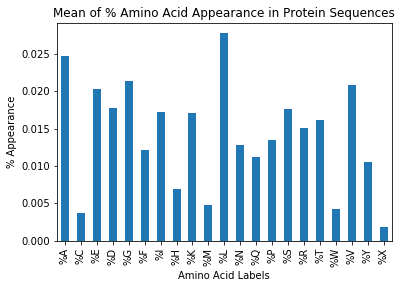

In [6]:
# plot Correlation of Amino Acid Frequency in the Sequence
ax = df[aa_feature_labels].mean(0).plot(kind='bar', title='Mean of % Amino Acid Appearance in Protein Sequences')
ax.set_xlabel('Amino Acid Labels')
ax.set_ylabel('% Appearance')
plt.show()

Looking at the raw distribution of amino acid residues among all sequences, there didn't seem to be any biases towards a particular type of amino acid. This made it difficult to figure out ways we could categorize the sequences, so we abandoned this route to look for correlations between secondary structure prediction accuracy and the distribution of amino acids in a given sequence.

### Evaluating Sequence Length

Another thing we wanted to know is if there is any correlation between sequence length and the prediction accuracy of our model. (i.e Could it be that our model performs better when given longer sequences?) To do this we created a scatter plot out of the sequence length of each protein with regards to the percent accuracy from our model. We hypothesized that it is harder for the network to get higher accuracies on the longer sequences since there are more secondary structures to predict.

We plotted the data with the following code segment taken from ```marshuang80/Protein_structure_prediction/```<a href="https://github.com/marshuang80/Protein_structure_prediction/blob/master/graphs_and_stats.py"><b>```graphs_and_stats.py```</b></a>.

- ```test_length``` is the length of the protein sequence that will be plotted.
- ```test_acc``` is the prediction accuracy for that given sequence.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


# Scatter plot of length vs accuracy
plt.plot(test_length,test_acc,'o')
plt.xlabel("Sequence length")
plt.ylabel("% accuracy)
z = np.ployfit(test_length,test_acc,1)
p = np.ploy1d(z)
plt.plot(test_length, p(test_length),'r--')

In [ ]:
# Look for statistical significance
results = sm.OLS(test_acc,sm.add_constant(test_length)).fit()
print(results.summary())

The scatterplot we generated:

![sequence length versus accuracy plot](Pr_023-master/seq-len_accuracy_plot.png "Sequence Length vs. Accuracy Plot")

The significance table we generated:

![sequence length versus accuracy significance](Pr_023-master/seq-len_accuracy_significance.png "Sequence Length vs. Accuracy Significance")

From the graph there appears to be a negative correlation between sequence length and % accuracy, however it could be that their is a bias for shorter sequences just because there are more short sequences than longer sequences. 

By looking at the scatter plot, it certainly looks like there is a correlation when we add the trend line. However, when used the OLS regression result, we found out that the trendline has an R-squared value of 0.084, with 1 best the best. Thus, we failed to statistically prove a significance between the sequence length and prediction accuracy.

### Evaluating Meta Secondary-Structures

Finally, we wanted to know if there were any correlation between a protein’s meta secondary structure (the type of secondary structure) and the prediction accuracy of our model. To do this, we first evaluated the known secondary structures associated with a protein sequence and categorized our proteins based on if the alpha-helix structure was the most prominent structure on the protein, if the beta-sheet structure was the most prominent, and if neither of these two were prominent (in which case, we classified a protein in an “other” category. 

In [7]:
import numpy as np
import pandas as pd

# LOADS CULLPDB+PROFILE_6133: training/validation/test set division
# [0,5600) training
# [5605,5877) test 
# [5877,6133) validation

cullpdb_raw = np.load("cullpdb+profile_6133.npy.gz")
cullpdb = cullpdb_raw.reshape(cullpdb_raw.shape[0],700,57)

In [8]:
# within our dataset, there are signatures for each meta secondary 
# structure at a given amino acid position according to the array below:
secondary_label = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T','NoSeq']

# amino acids are labeled with a given secondary label if it has a value
# of 1, if it does not have a label, it has a value of 0

Alpha-helices are indicated by the G, H, and I secondary structure labels, beta-sheets are indicated by the E and B secondary structure labels, and "other" structures are indicated by the L, S, and T secondary structure labels. For the alpha and beta protein secondary structures, these labels are different subtypes of a given structure.

In [9]:
# in this dictionary, we have categorized our secondary structure labels
# according to what protein secondary structure it is associated with
meta_structures = {'G':'helix', 'H':'helix', 'I':'helix',
                  'E':'sheet', 'B':'sheet',
                  'L':'other', 'S':'other', 'T':'other'}

For each protein, we looked at the secondary structure labels and tally the number of labels associated with alpha-helices, beta-sheets, and other secondary structures. Then, we calculated the percentage of the protein that is labeled as a 'helix', 'sheet', or 'other'.

In order to categorize our different proteins, we placed it in the bin of the majority label: the majority percentage out of 'helix', 'sheet', or 'other'. However, if the 'helix' and 'sheet' structures are both the majority and are relatively equal, that is, within a given percent threshold of each other, then it was categorized as alpha-helix + beta-sheet.

In [10]:
# we'll start the analysis at a 5% threshold
threshold = 5 

# first, we'll make the method that will evaluate our structure counter
def categorize_structure(structure_counter, threshold):
    """
    a method which evaluates the counter of 'helix'-, 'sheet'-,
    and 'other'-related secondary structure labels, and determines
    if a protein should be categorized as a alpha-helix,
    beta-sheet, alpha-helix + beta-sheet, or other 
    protein secondary structure.
    """
    # add +1 to each counter to prevent 0 percentages (pseudo-counts) during calculations,
    # and also convert the dictionary to a list with a set order (helix, sheet, then other)
    pseudo_counts = [structure_counter[structure]+1 for structure in ['helix','sheet','other']]
    
    total_sum = sum(pseudo_counts)
    pseudo_counts = [float(value)/total_sum*100 for value in pseudo_counts]
    
    classification = ""
    if pseudo_counts.index(max(pseudo_counts)) == 0 or pseudo_counts.index(max(pseudo_counts)) == 1:
        # checks if our maximum percent belongs to a 'helix' or 'sheet', 
        # and checks to see if they are within 5% of each other
        if sorted(pseudo_counts[0:2])[1] - sorted(pseudo_counts[0:2])[0] <= threshold:
            classification = "helix+sheet"
        else:
            classification = ['helix','sheet'][pseudo_counts.index(max(pseudo_counts))]
    else: 
        # if the maximum is not a helix or a sheet, then it must be another protein secondary structure
        classification = 'other' 
    
    return(classification,pseudo_counts)
    
################################################################################
# after writing the method, we can look at our protein sequences and categorize them!

# store our categorizations for each protein within a pandas dataframe then start sorting
df = pd.DataFrame(columns=['Secondary Structure'])

# stores the percentages of the different structure labels if necessary for additional analysis
secondary_structure_percentages = []

for protein in cullpdb:
    structure_counter = {'helix':0, 'sheet':0, 'other':0}
    for amino_acids in protein: 
        # obtains secondary structure label for a given residue in the protein
        label = secondary_label[np.nonzero(amino_acids[22:31] == 1)[0][0]]
        if label == 'NoSeq':
            # break if we've reached the end of the sequence
            break
        else:
            # else, increment the counter for a given secondary structure
            structure_counter[meta_structures[label]] += 1
    
    # adds our categorization to the pandas dataframe (each row is a different protein within cullpdb)
    classification = categorize_structure(structure_counter,threshold)
    df = df.append(
        pd.DataFrame([classification[0]],columns=['Secondary Structure']),
        ignore_index=True)
    secondary_structure_percentages.append(classification[1])

This segment populated a pandas dataframe with N proteins x 1 feature, where the single feature is if we've sorted it into the alpha-helix, beta-sheet, alpha-helix + beta-sheet, or other protein secondary structure bin. 

We then plotted these values as a bar graph and scatterplot to see if there were any correlation between protein sequence type (those with more alpha-helicies, beta-sheets, both, or other structural labels) and protein secondary structure prediction accuracy. 

The code for the plots was taken from ```marshuang80/Protein_structure_prediction/```<a href="https://github.com/marshuang80/Protein_structure_prediction/blob/master/graphs_and_stats.py"><b>```graphs_and_stats.py```</b></a>.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Bar graph for categories
struc = df["Secondary Structure"].values
test_struc = struc[5600:]
cat_acc = [(a,b) for a,b in zip(test_acc,test_struc)]

other = np.array([a[0] for a in cat_acc if a[1] == 'other'])
sheet = np.array([a[0] for a in cat_acc if a[1] == 'sheet'])
helix = np.array([a[0] for a in cat_acc if a[1] == 'helix'])

other_mean = other.mean()
helix_mean = helix.mean()
sheet_mean = sheet.mean()

other_std = other.std()
sheet_std = sheet.std()
helix_std = helix.std()

plt.bar(np.arange(3),(other_mean,sheet_mean,helix_mean),0.35,yerr=(other_std,sheet_std,helix_std)
,color = 'rgb')

plt.xticks(np.arange(3),
          ("other \n %f"%other_mean,
            "helix \n %f"%helix_mean,
            "sheet \n %f"%sheet_mean),
            fontsize=18)
plt.xlabel("Categories",fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

The bar plot we generated:

![meta secondary structures vs prediction accuracy bar plot](Pr_023-master/meta-secondary-structures_accuracy_barplot.png "Meta Secondary Structures vs. Prediction Accuracy Bar Plot")

By plotting out the mean and standard deviation, we can already see that “sheet” structured proteins are 10% more accurate than “other” on average. 

In [ ]:
# Categories scatter plot
helix_s, = plt.plot(np.arange(helix.shape[0]),helix,'bx')
sheet_s, = plt.plot(np.arange(sheet.shape[0])*3.7,sheet,'ro')
other_s, = plt.plot(np.arange(other.shape[0])*1.55,other,'g^')
plt.ylabel("% accuracy",fontsize=18)
plt.legend((helix_s,other_s,sheet_s),('helix','other','sheet'),loc = 'lower right', fontsize=10)

The scatterplot we generated:

![meta secondary structures vs prediction accuracy scatterplot](Pr_023-master/meta-secondary-structures_accuracy_scatterplot.png "Meta Secondary Structures vs. Prediction Accuracy Scatterplot")

The correlation became more obvious when we did a scatter plot on these test accuracies. As shown in the plot, the sheets are mostly scattered on the top region, while “others” are found mostly on the bottom.

In [ ]:
# ANOVA test
f_val, p_val = stats.f_oneway(sheet,helix,other)
if p_val < 0.0001:
    print("Statistically different based on ANOVA variance test")
else:
    print("Not statistically different")

When we used the scipy statistic package to do an ANOVA test on our three categories, we got a p_val of 3.9e-29, thus proving that the accuracies for each structures are significantly different.

## What does all this data tell us?

Overall, we were able to develop a tool that was able to utilize neural networks, to predict protein structure. We were able to achieve an testset accuracy of approximately 69.5% and training set accuracy of 73.45% when we train our model with 1000 iterations. This accuracy was calculated without padding because while the padding provided a higher accuracy, the padding has no relevance to a biological context and was thus removed during the calculation of the above accuracy. We further validated our results through conducting ANOVA tests to check if there is a significant difference in accuracy between sequences of different secondary structures which produced a P value of 3.97 e-29 indicating that our results are indeed significant. Therefore, we proved our initial hypothesis that there is a correlation between protein’s property and it’s prediction accuracy through a neural network.

While our current steps have produced a result comparable to various protein predicting tools out there such as the <a href="https://arxiv.org/pdf/1702.03865.pdf">one implemented at Google which yielded an accuracy of approximately 70%</a>, there is still room for improvement. Currently as shown in one of the figures above, there seems to be a skewing in regards to the accuracy of structures, being more accurate for structures that are sheet based rather than helical based. This can be attributed to some of the features being used such as the solvent accessibility and thus there should be consideration in adding additional features to address the skew and improve the accuracy of our tool.

Furthermore, another aspect that could improve the tool is through the addition of layers within the neural network. The additional filtering would be able to provide a more accurate answer. While this approach is viable, our current approach already requires immense computational resources as shown by the amount of time required to output the data (5 - 7 hours with a 4GB Nvidia GPU). Thus, to implement this, more computational resources is required.